<a href="https://colab.research.google.com/github/tirtharaj21/Visa-and-Mastercard-Analysis/blob/main/Mastercard%26visa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving MVR.csv to MVR.csv


#Data Preprocessing

In [5]:
mv=pd.read_csv('MVR.csv')
mv=mv.sort_values('Date')
mv.head(3)

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
0,2008-06-02,30.926001,32.000000,30.257000,32.00,29.529486,50620000,21.552500,21.737499,21.1500,21.517500,19.202324,36856000
1,2008-06-03,31.386999,31.399000,30.235001,30.74,28.366755,93913000,21.752501,21.987499,21.5075,21.889999,19.534735,48411600
2,2008-06-04,30.745001,30.959999,29.454000,29.74,27.443956,66160000,21.770000,22.025000,21.3200,21.370001,19.070698,40684400


In [ ]:
mv.isnull().sum()

Date           0
Open_M         0
High_M         0
Low_M          0
Close_M        0
Adj Close_M    0
Volume_M       0
Open_V         0
High_V         0
Low_V          0
Close_V        0
Adj Close_V    0
Volume_V       0
dtype: int64

In [ ]:
mv.isna().sum()

Date           0
Open_M         0
High_M         0
Low_M          0
Close_M        0
Adj Close_M    0
Volume_M       0
Open_V         0
High_V         0
Low_V          0
Close_V        0
Adj Close_V    0
Volume_V       0
dtype: int64

In [ ]:
nan_dates = mv['Date'].isna().sum()
nan_dates

0

In [ ]:
mv.shape

(4047, 13)

In [ ]:
mv.describe()

,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
count,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03
mean,164.535600,166.170139,162.857876,164.563858,160.646182,8.249296e+06,107.988356,108.965956,106.999128,108.003625,104.551613,1.386969e+07
std,138.620480,139.946015,137.248286,138.635551,138.057771,1.140882e+07,82.319225,83.020901,81.600647,82.319975,81.900950,1.469735e+07
min,12.100000,12.736000,11.305000,11.918000,11.024753,6.411000e+05,10.672500,11.047500,10.445000,10.605000,9.496159,1.640900e+06
25%,42.459502,42.865499,42.062000,42.452500,39.624086,2.988750e+06,30.157500,30.582501,29.888750,30.253750,27.724516,6.652450e+06
50%,97.440002,98.089996,96.699997,97.599998,92.752449,4.409000e+06,78.690002,79.349998,78.150002,78.620003,74.387733,9.420400e+06
75%,304.414994,306.979995,300.304993,303.910004,297.765701,8.251500e+06,193.044998,195.095001,190.185005,192.940002,187.882408,1.526840e+07
max,488.529999,490.000000,483.640015,488.640015,487.964142,1.787220e+08,290.000000,290.959991,287.899994,290.369995,289.833618,3.375336e+08


#Price Comparisons

##Closing vs Opening Stocks

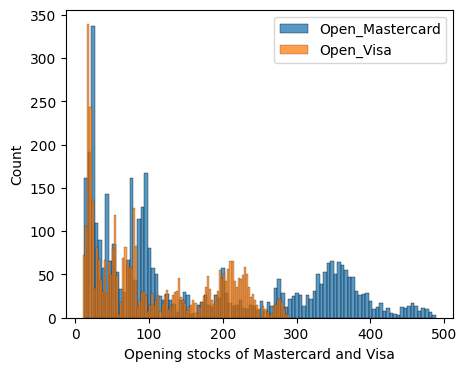

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(mv['Open_M'],bins=100)
sns.histplot(mv['Open_V'],bins=100)
plt.legend(['Open_Mastercard','Open_Visa'])
plt.xlabel('Opening stocks of Mastercard and Visa')
plt.show()

Most of the time the opening stocks Of both Mastercard and visa are within 0 to 100 stocks

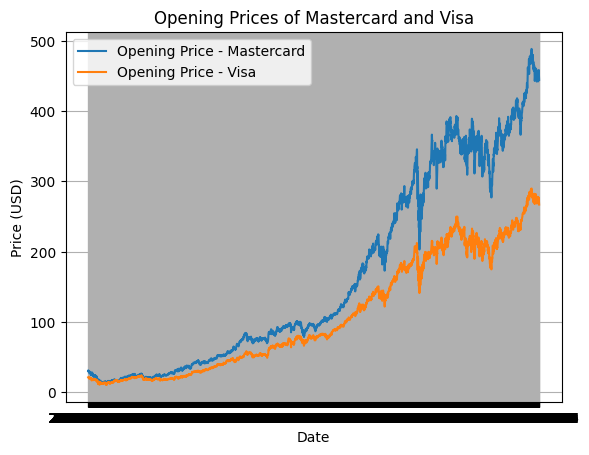

In [ ]:
plt.plot(mv['Date'], mv['Open_M'], label='Opening Price - Mastercard')

plt.plot(mv['Date'], mv['Open_V'], label='Opening Price - Visa')

plt.title('Opening Prices of Mastercard and Visa')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

But here we see that after particular date, the opening stock prices for master card and visa were above 100.Let's find them out

In [ ]:
mv.loc[(mv['Open_M']>100),'Date']

1868    2015-10-30
1871    2015-11-04
1873    2015-11-06
1874    2015-11-09
1876    2015-11-11
           ...    
4042    2024-06-24
4043    2024-06-25
4044    2024-06-26
4045    2024-06-27
4046    2024-06-28
Name: Date, Length: 1963, dtype: object

In [ ]:
mv.loc[(mv['Open_V']>100),'Date']

2303    2017-07-25
2304    2017-07-26
2305    2017-07-27
2308    2017-08-01
2309    2017-08-02
           ...    
4042    2024-06-24
4043    2024-06-25
4044    2024-06-26
4045    2024-06-27
4046    2024-06-28
Name: Date, Length: 1741, dtype: object

The opening stock prices of MasterCard were always greater than the prices of visa card, after prices got over 100. Opening prices of Mastercard go beyond 100, from 30th October 2015, On the other hand prices of Visa card go beyond 100 from 25th July 2017.

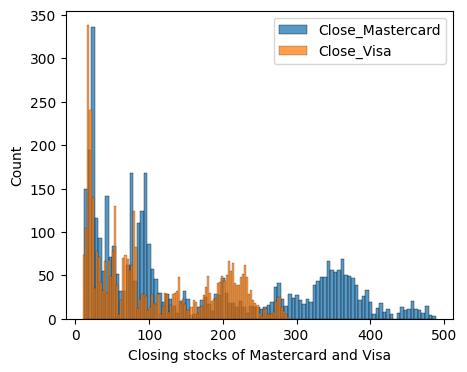

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(mv['Close_M'],bins=100)
sns.histplot(mv['Close_V'],bins=100)
plt.legend(['Close_Mastercard','Close_Visa'])
plt.xlabel('Closing stocks of Mastercard and Visa')
plt.show()

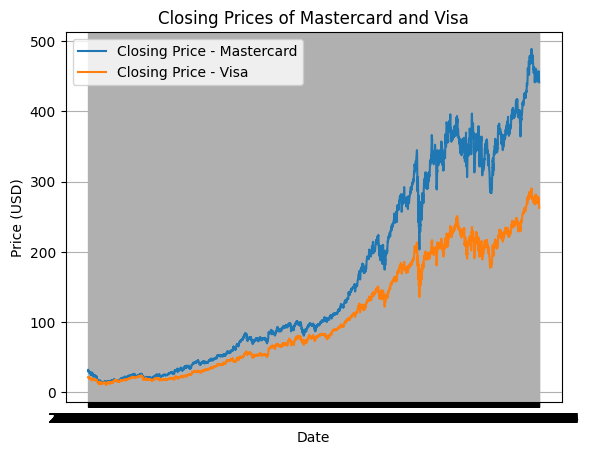

In [ ]:
plt.plot(mv['Date'], mv['Close_M'], label='Closing Price - Mastercard')

plt.plot(mv['Date'], mv['Close_V'], label='Closing Price - Visa')

plt.title('Closing Prices of Mastercard and Visa')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

The closing stocks also follow the same pattern as that of opening stocks that is prices of Mastercard stocks is always higher than that of visa card after they cross the price of 100.

In [ ]:
mv.loc[(mv['Close_M']>100),'Date']

1866    2015-10-28
1867    2015-10-29
1870    2015-11-03
1871    2015-11-04
1872    2015-11-05
           ...    
4042    2024-06-24
4043    2024-06-25
4044    2024-06-26
4045    2024-06-27
4046    2024-06-28
Name: Date, Length: 1967, dtype: object

In [ ]:
mv.loc[(mv['Close_V']>100),'Date']

2302    2017-07-24
2304    2017-07-26
2308    2017-08-01
2309    2017-08-02
2310    2017-08-03
           ...    
4042    2024-06-24
4043    2024-06-25
4044    2024-06-26
4045    2024-06-27
4046    2024-06-28
Name: Date, Length: 1740, dtype: object

The closing stocks Price of Mastercard goes beyond 100 from 28th October 2015 whereas it is 24th July 2017 in case of visa card.

Visa calc.

In [ ]:
mv.loc[(mv['Date']=='2017-07-24'),'Close_V']

2302    100.370003
Name: Close_V, dtype: float64

In [ ]:
mv.loc[(mv['Date']=='2017-07-25'),'Open_V']

2303    100.650002
Name: Open_V, dtype: float64

Mastercard calc.

In [ ]:
mv.loc[(mv['Date']=='2015-10-29'),'Open_M']

1867    99.879997
Name: Open_M, dtype: float64

In [ ]:
mv.loc[(mv['Date']=='2015-10-29'),'Close_M']

1867    100.589996
Name: Close_M, dtype: float64

In [ ]:
mv.loc[(mv['Date']=='2015-10-30'),'Open_M']

1868    100.769997
Name: Open_M, dtype: float64

From the above observations we can conclude that opening stock Price of any product on any day depends upon the closing stock price of the previous day of the same product. In case of visa card, on 24th July 2017 the closing stock price just touched 100(100.37), whereas in 25th July 2017 the opening stock became 100.67. In case of Mastercard,Closing stock price on 29th October 2015 was 100.58 and on the next day 30th October for the first time opening stock prices of Mastercard got beyond 100 that is 100.76. It is not that opening price stock prices will always be greater ,it can be lesser too, for example check prices for master card on 28th and 29th October 2015; but closing stock sets a standard for tomorrow's opening stock.

In [ ]:
mv.loc[(mv['Open_M']==mv['Open_V']),'Date']

122    2008-11-21
Name: Date, dtype: object

In [ ]:
mv.loc[(mv['Open_M']==mv['Open_V']),'Open_V']

122    12.4
Name: Open_V, dtype: float64

On 21st November 2008,opening stock prices of both MasterCard and Visa were same. (12.4)

In [ ]:
mv.loc[(mv['Close_M']==mv['Close_V']),'Date']

Series([], Name: Date, dtype: object)

##Dividend Computation

In [6]:
div=pd.DataFrame({
    'Date':mv['Date'],
    'Close':mv['Close_M'],
    'Adj Close_M':mv['Adj Close_M'],
    'Dividend_M':mv['Close_M']-mv['Adj Close_M'],
    'Close_V':mv['Close_V'],
    'Adj Close_V':mv['Adj Close_V'],
    'Dividend_V':mv['Close_V']-mv['Adj Close_V']
})
div.head(3)

,Date,Close,Adj Close_M,Dividend_M,Close_V,Adj Close_V,Dividend_V
0,2008-06-02,32.00,29.529486,2.470514,21.517500,19.202324,2.315176
1,2008-06-03,30.74,28.366755,2.373245,21.889999,19.534735,2.355264
2,2008-06-04,29.74,27.443956,2.296044,21.370001,19.070698,2.299303


In [ ]:
div.describe()


,Close,Adj Close_M,Dividend_M,Close_V,Adj Close_V,Dividend_V
count,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000,4047.000000
mean,164.563858,160.646182,3.917676,108.003625,104.551613,3.452012
std,138.635551,138.057771,1.925095,82.319975,81.900950,1.502533
min,11.918000,11.024753,0.000000,10.605000,9.496159,0.000000
25%,42.452500,39.624086,2.096799,30.253750,27.724516,2.018092
50%,97.599998,92.752449,4.328453,78.620003,74.387733,3.594677
75%,303.910004,297.765701,5.261666,192.940002,187.882408,4.709705
max,488.640015,487.964142,8.110657,290.369995,289.833618,6.439896


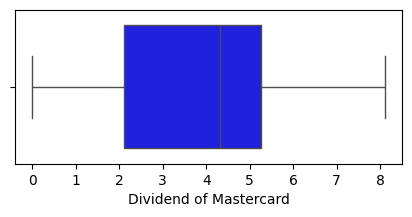

In [ ]:
plt.figure(figsize=(5,2))
sns.boxplot(x='Dividend_M',data=div,color='blue')
plt.xlabel('Dividend of Mastercard')
plt.show()

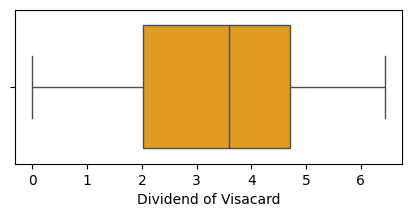

In [ ]:
plt.figure(figsize=(5,2))
sns.boxplot(x='Dividend_V',data=div,color='orange')
plt.xlabel('Dividend of Visacard')
plt.show()

Dividend data of both cards have no outliers

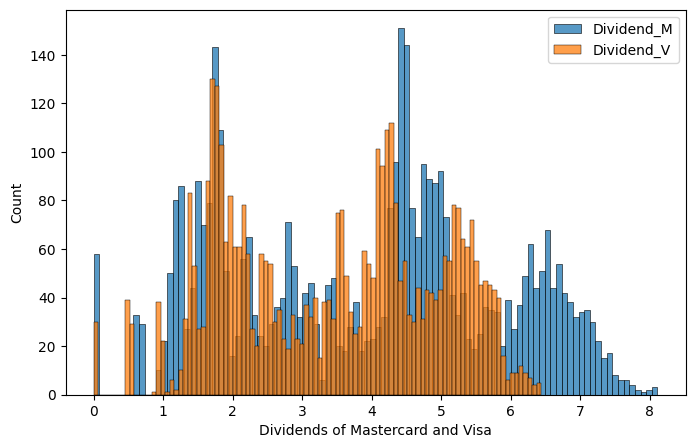

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(div['Dividend_M'],bins=100)
sns.histplot(div['Dividend_V'],bins=100)
plt.legend(['Dividend_M','Dividend_V'])
plt.xlabel('Dividends of Mastercard and Visa')
plt.show()

But skewness is much high

Important calculations:

In [9]:
div.loc[(div['Dividend_M']==div['Dividend_M'].max()),'Date']

2949    2020-02-19
Name: Date, dtype: object

In [11]:
div.loc[(div['Dividend_V']==div['Dividend_V'].max()),'Date']

2936    2020-01-30
Name: Date, dtype: object

In [14]:
div.loc[(div['Dividend_M']==div['Dividend_V']),'Date'][:3]

4017    2024-05-16
4018    2024-05-17
4019    2024-05-20
Name: Date, dtype: object

#Volume analysis

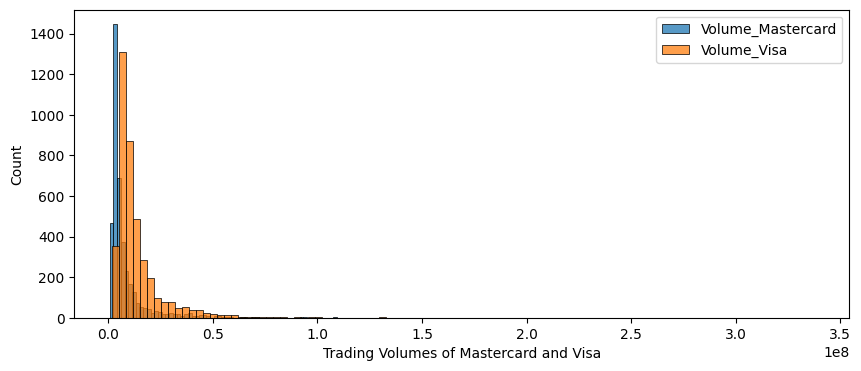

In [15]:
plt.figure(figsize=(10,4))
sns.histplot(mv['Volume_M'],bins=100)
sns.histplot(mv['Volume_V'],bins=100)
plt.legend(['Volume_Mastercard','Volume_Visa'])
plt.xlabel('Trading Volumes of Mastercard and Visa')
plt.show()

In [17]:
volv=pd.DataFrame(mv.groupby('Date')['Volume_V'].sum())
volm=pd.DataFrame(mv.groupby('Date')['Volume_M'].sum())
vol=volv.join(volm)
#volv=mv.groupby('Date')['Volume_V'].sum()
#volm=mv.groupby('Date')['Volume_M'].sum()
#vol=volv.concat(volm)
vol.head(3)


,Volume_V,Volume_M
Date,,
2008-06-02,36856000,50620000
2008-06-03,48411600,93913000
2008-06-04,40684400,66160000


In [ ]:
vol1=mv[['Date','Volume_V','Volume_M']]
vol1.tail(3)

,Date,Volume_V,Volume_M
4044,2024-06-26,12172000,2451400
4045,2024-06-27,10529100,3313800
4046,2024-06-28,13955100,4105000


In [ ]:
vol.describe()

,Volume_M,Volume_V
count,4.047000e+03,4.047000e+03
mean,8.249296e+06,1.386969e+07
std,1.140882e+07,1.469735e+07
min,6.411000e+05,1.640900e+06
25%,2.988750e+06,6.652450e+06
50%,4.409000e+06,9.420400e+06
75%,8.251500e+06,1.526840e+07
max,1.787220e+08,3.375336e+08


In [ ]:
vol1.describe()

,Volume_V,Volume_M
count,4.047000e+03,4.047000e+03
mean,1.386969e+07,8.249296e+06
std,1.469735e+07,1.140882e+07
min,1.640900e+06,6.411000e+05
25%,6.652450e+06,2.988750e+06
50%,9.420400e+06,4.409000e+06
75%,1.526840e+07,8.251500e+06
max,3.375336e+08,1.787220e+08


Volatility of visa card volume is more than mastercard volume

In [ ]:
vol1.loc[(mv['Volume_V']==(mv['Volume_V'].max())),'Date']

392    2009-12-18
Name: Date, dtype: object

In [ ]:
vol1.loc[(mv['Volume_V']==(mv['Volume_V'].min())),'Date']

3898    2023-11-24
Name: Date, dtype: object

In 18th December 2009 and 24th November 2023, trading volumes of visa card were maximum and minimum respectively.

In [ ]:
vol1.loc[(mv['Volume_M']==(mv['Volume_M'].max())),'Date']

32    2008-07-17
Name: Date, dtype: object

In [ ]:
vol1.loc[(mv['Volume_M']==(mv['Volume_M'].min())),'Date']

2912    2019-12-24
Name: Date, dtype: object

In 17th July 2008 And 24th December, 2019 trading volumes of mastercard were maximum and minimum respectively.

In [ ]:
vol1.loc[(mv['Volume_M']==mv['Volume_V']),'Date']

Series([], Name: Date, dtype: object)

Trading volumes of Mastercard and Visa were never the same in 16 years

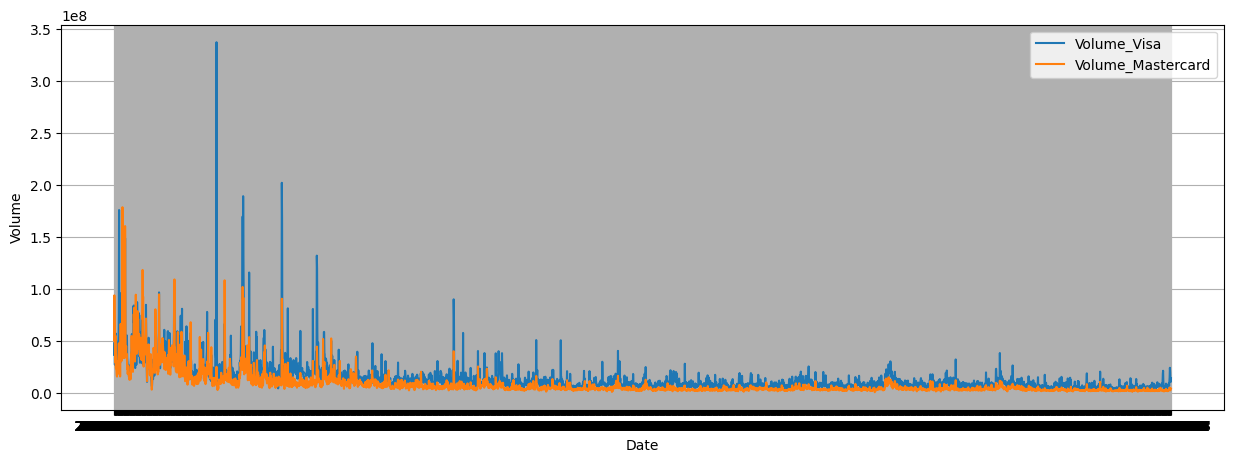

In [19]:
plt.figure(figsize=(15,5))
plt.plot(vol)
plt.legend(['Volume_Visa','Volume_Mastercard'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

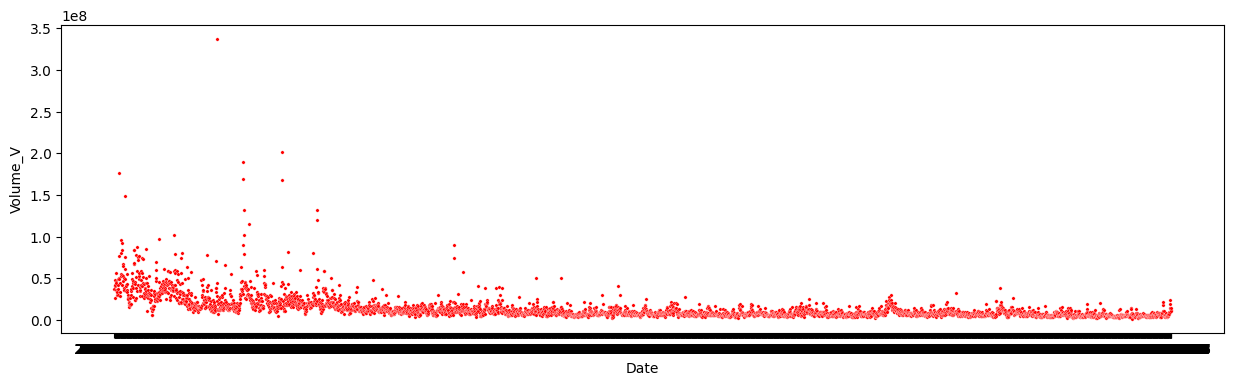

In [ ]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='Date',y='Volume_V',data=mv,s=6,color='red')
plt.xlabel('Date')
plt.ylabel('Volume_V')
#plt.grid(True)
plt.show()

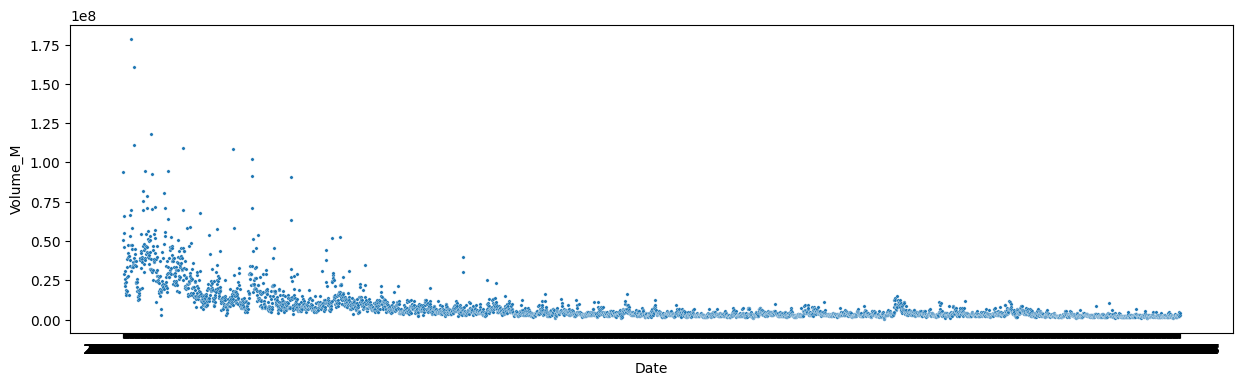

In [ ]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='Date',y='Volume_M',data=mv,s=6)
plt.xlabel('Date')
plt.ylabel('Volume_M')
#plt.grid(True)
plt.show()

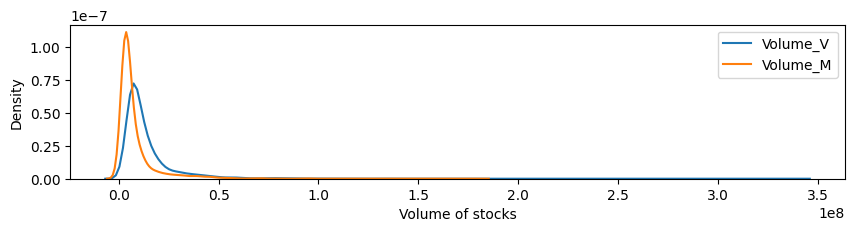

In [20]:
plt.figure(figsize=(10,2))
x=mv['Volume_M']
y=mv['Volume_V']
sns.kdeplot(data=y)
sns.kdeplot(data=x)
plt.legend(['Volume_V','Volume_M'])
plt.xlabel('Volume of stocks')
plt.show()